<a href="https://colab.research.google.com/github/daz261/SocialGraphs/blob/main/Explainer_Notebook_Template_Daria_Github_Dec8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Motivation
### What is your dataset?
The dataset we use is combined from multiple sources, where Wikipedia plays the main role and other are used to enrich the primary dataset.

### A. Primary data source
The core part of the dataset is downloaded from the Wikipedia. Using the Wikipedia API, we have gathered data on music artists from 1990-1999 including:

1. Album release date

2. Data about the artist: genre, years active, labels

3. Collaborations between artists on the same album

Determining whether a hyperlink on an artist's wik counts as a collaboration was not trivial. Apart from links to potential collaborators, some of these in-page links include references to song writers (for example if album includes a cover), sources of inspiration, former band members etc. In order to filter these references out, wesplit each whole artist string by key symbols such as “&”, “,”, and “Featuring”, then did a few edits for when this heuristic failed. However, the accuracy of our identified collaborations is not 100%, which is why later on in our analysis we compared it with data from secondary sources. The code used to download the Wiki data can be found at: [TODO:link to code] and its output is available [TODO:link to download artist csv] 

### B. Secondary data sources
In order to enrich our network, we use a number of secondary data sources:
#### 1. **Spotify API**
For each song in collected albums we use Spotify API [available here](https://developer.spotify.com/documentation/web-api/) to gather their audio features. All audio feature descriptions follow the API's [description](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features). These include:

a. **acousticness** : A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic

b. **danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

c. **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

d. **instrumentalness**:  Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

e.**liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

f.**speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

g.**tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

h. **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


#### 2. **Billboard**
We used [this Kaggle dataset](https://www.kaggle.com/danield2255/data-on-songs-from-billboard-19992019) to get information about popularity of the albums, as measured by Billboard magazine charts. Billboard publishes lists of relative popularity of albums and songs each week. It is US-based, but they aim to be global.

The features we use are:

a. **last week** : Weeks since the album has been in Billboard charts last time (measured since the point of the Kaggle dataset creation)

b. **weeks on chart** : Number of weeks the album had any of its song in Billboard charts.

c. **peak rank** :The highest rank the album has reached in the charts.

#### 3. **Genius**
We used a portal Genius API to extract songs lyrics, which we later use for TF-IDF and sentiment analysis.

## Why did you choose this/these particular dataset(s)?
Our motivation for choosing this dataset is the puzzling fact that throughout the period of Jan 1990 — Aug 2015, 23.59% of all unique songs in the Top 10 Billboard were collaborations [2]. Most notably, this made us wonder if the success of these artists give rise to the popularity of collaborations or whether they just followed the rise in multi-artist hits. Having that in mind, we decided to turn our attention to an entire decade of musix - the 1990's. 

The reason for choosing the 1990s in music was the rise in popularity of several genres, such as hip-hop, rap, reggae, R&B and other genre, as well as the rise of the boys and girls band groups. The 1990s also saw a resurgence of older styles in new contexts, including third wave ska and swing revival, both of which featured a fusion of horn-based music with rock music elements.  Apart from the diversiy of genres, the 90's are defined by a combination of sounds that left a boundary-breaking legacy that remains today. Most of the artists that rose to fame in the 1990's are still featured in the charts today: Mariah Carey, Jennifer Lopez, JayZ, Queen Latifa, P.Diddy etc. [5] The wide diversity of artists, genres, collaborations makes the 90's in music a rich dataset to explore in our analysis.
<!-- 
We have decided to use English wikipedia as the core part of our dataset as firstly, it has all the informations we initially thought we need for the project. Secondly, its API is rich and easy to use. As the project progressed came up with ideas of secondary data that could make the network more rich and interesting, which is how we came up with Billboard, Spotify and Genius datasources. 
Our motivation for these particular datasets was the 


 -->

## What was your goal for the end user's experience?
The goal was to give users insights into the interactions between artists. Some of the questions which we tried to answer are:
1. What attributes make an artist successful? What are these success metrics?
2. Can collaborations between artists be an indicator of an artist's success?
3. Is there a correlation between the sentiment score of lyrics and an artist's success over time?

For the end user's experience, the purpose of the project was to give users better insights regarding an artist's likelihood of success over time based on a number of factors such as the record label, the album's release date, the genre, the number of collaborations.
<!--

Goal:
Analyze correlations between artist rankings, collaborations from a genre analysis 
Determine what attributes make an artists successful 
Sentiment Analysis - 
Use the Spotify API to examine the music 
characteristics of the albums  -->

## 2. Basic stats 

### Write about your choices in data cleaning and preprocessing
The data cleaning of our dataset, which is represented by the Wikipedia pages, consisted of two steps:

1. First, we have used parsing library called BeautifulSoup to load tables from wiki pages like https://en.wikipedia.org/wiki/1990_in_music in range 1990 - 2000 TODO[LINK TO CODE]. Each contains a table of albums and their authors. We have decided to drop albums which were merely o compilation of songs. Luckily, these were marked either as "Box set" or "Compilation" in column Note.  

2. Second, we used Wikipedia API [TODO: LINK TO CODE] to determine collaborations by checking links from each album's wiki page. This has automatically resulted in dropping out albums without a wiki page. Finally, we have filtered these links so that they only include artists or bands. Each of the remaining links we assume to be an interaction between artists.

For the secondary data sources (Spotify, Genius and Billboard), the incorporation of the data was easier, as at this point a list of authors and albums was available. In cases of Spotify and Genius we needed to use external APIs to obtain features of each song of each album, which were later averaged per album. In case of Billboard we had to merge a dataset 

The following methodology was applied for building our network:

1. Nodes were represented by the artists who released an album between 1990-1999.
2. Assign node attributes to each artist (node) represented by years active, label, music genre.
3. Idenfity pairs of collaborators per album and add them as edges to connec the artists. 
4. Assign weights to the edges, represented by how many distinct albums each pair of artists has collaborated on.

### Write a short section that discusses the dataset stats (here you can recycle the work you did for Project Assignment A)
We managed to build a network of 1983 nodes (1950 in the undirected graph) represented by artists who released an album during the 1990's with 8072 edges represented by the collaborations between them. The in and out-degree distributions are represented in Figures 1 and 2 below, indicatin that both of them follow the power-law distribution. A visualization of the network can be seen in Figure 3 below. 

In [ ]:
# Load graph
with open("G_sa.pickle", 'rb') as f: 
    G = pickle.load(f)
#G = nx.read_gpickle("../graph_building/G.pickle")
LC = max(nx.weakly_connected_components(G), key=len)
# Save only the largest component as G
GG = nx.DiGraph(G.subgraph(LC))
G_u = GG.to_undirected()

In [ ]:
print(f'Nodes in graph: {len(list(G.nodes()))}')
print(f'Nodes in undirected graph: {len(list(G_u.nodes()))}')
print(f'Edges: {G_u.number_of_edges()}')


Nodes in graph: 1983
Nodes in undirected graph: 1950
Edges: 8072


In [ ]:
#list of in-degrees
in_deg = [v for k, v in dict(GG.in_degree).items()]
#list of out-degrees
out_deg =  [v for k, v in dict(GG.out_degree).items()]

In [ ]:
#sort the in and out-degree lists and extract the top value
top_character_in = sorted([(node, degree) for node, degree in GG.in_degree], key=lambda t: t[1])[-1]
top_character_out = sorted([(node, degree) for node, degree in GG.out_degree], key=lambda t: t[1])[-1]
print(f'The top connected character (in-degrees) is {top_character_in[0]} with {top_character_in[1]} links.')
print(f'The top connected character (out-degrees) is {top_character_out[0]} with {top_character_out[1]} links.')

The top connected character (in-degrees) is The Beatles with 82 links.
The top connected character (out-degrees) is Alanis Morissette with 106 links.


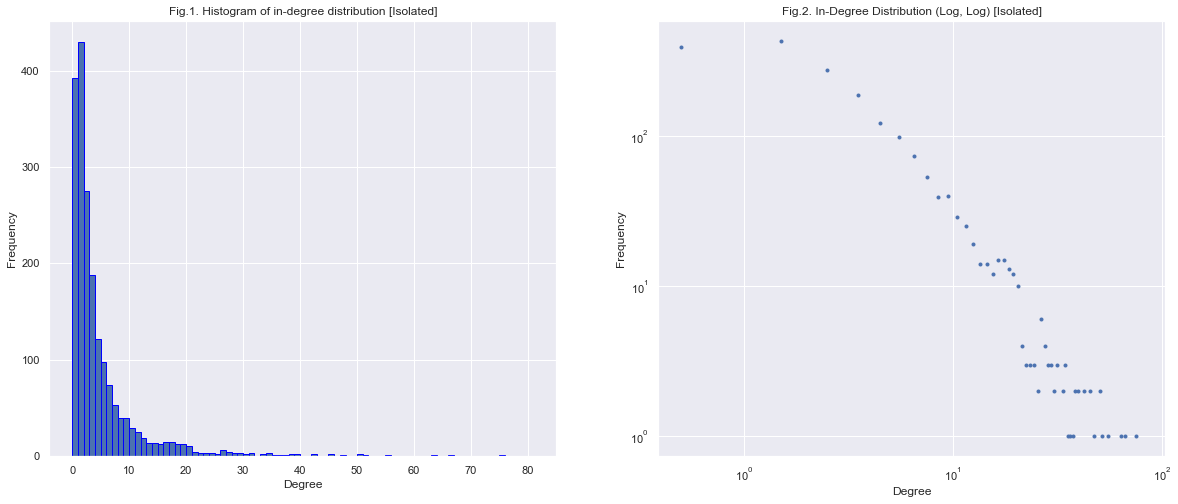

In [ ]:
#In and Out Degree Distributions
#Plot degree distribution 
from sentiment_analysis import plot_degree_distribution
plot_degree_distribution(in_deg, "Fig.1. Histogram of in-degree distribution [Isolated]", 
                        "Fig.2. In-Degree Distribution (Log, Log) [Isolated]")


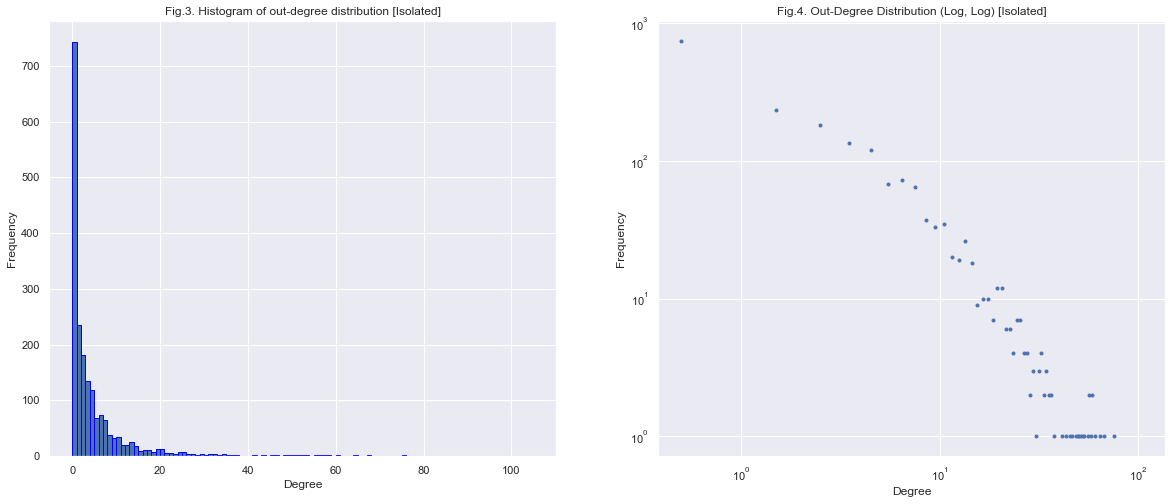

In [ ]:
#Plot degree distribution 
plot_degree_distribution(out_deg, "Fig.3. Histogram of out-degree distribution [Isolated]", 
                        "Fig.4. Out-Degree Distribution (Log, Log) [Isolated]")

In [ ]:
#visualization
#Figure 3
from visualizations import show_graph
show_graph(G, "Network")

### 3.2 Sentiment Analysis 

The purpose of the sentiment analysis part is to analyze the lyrics of different artists and albums in order to determine if the sentiment score for each album in the network is influenced by specific features such as genre, year, trend in the number of collaborations etc. Ultimately, the analysis of this part investigates the interplay between the LabMT sentiment score and features such as lexical richness, number of collaborations or weeks in chart and whether these can be used to predict the most successful artists and their albums. In order to do so, we broke down our analysis into 3 levels: exploratory sentiment analysis of all the artists in the network (3.2.1), analysis of communities of artists and associated genres (3.2.2) and analysis of the most successful artists (3.2.3).

In [ ]:
from typing import List
import requests
import tqdm
import os.path
from os.path import isfile, join
import community
from community import community_louvain
import pandas as pd
import os
from os import listdir
from os.path import isfile, join
import numpy as np
import zipfile
import os
from nltk.corpus import stopwords
from os.path import isfile, join
import regex as re
from tqdm import tqdm
import zipfile
from nltk.stem import WordNetLemmatizer
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from nltk import WordNetLemmatizer
from sentiment_analysis import preprocess
from sentiment_analysis import compute_sentiment_LabMT
import matplotlib
from matplotlib.lines import Line2D
from sentiment_analysis import show_bar_plot
from sentiment_analysis import partition_to_top3_names
import matplotlib
from matplotlib.lines import Line2D
sns.set()


In [ ]:
import pandas as pd
import scipy as sp

from sklearn import preprocessing
from sklearn import metrics
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import spearmanr
from scipy.stats import pearsonr
import sys
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestRegressor
sys.setrecursionlimit(3000)

In [ ]:
#upload lyrics files
#this may be a problem
LYRICS_FOLDER = "data/lyrics.zip"
LYRICS_PATH = "data/lyrics/"
with zipfile.ZipFile(LYRICS_FOLDER, 'r') as zip_ref:
    zip_ref.extractall(LYRICS_PATH)
files = [f for f in os.listdir(LYRICS_PATH) if isfile(join(LYRICS_PATH, f))]

punctuations = "?:!.,;"

df_sentiment = pd.read_csv("data/Data_Set_S1.txt", sep="	")
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
df = pd.read_csv("data/final_df.csv")
df = df.drop(columns=['Unnamed: 0', 'words'], axis=1)

###  3.2.1. Exploratory analysis of the overall sentiment score of the nodes in the network

In this part of the exercise, we use two sources of sentiment analysis scoring, based on the LabMT and VADER methods.  The LabMT method is implemented here only based on the sentiment score of each of the words in the text, as an arithmetic average of each word's score. It ranges between 1.3 and 8.5, with 5 being neutral. On the other hand, VADER (Valence Aware Dictionary and Sentiment Reasoner) is a rule-based method, but it also leverages on the previously mentioned word-level sentiment scores. However, it uses concepts such as boosters and negators to scale and flip the sentiments of the words accordingly. It was originally developed specifically for Twitter and social media analysis and it ranges between -3.9 and 3.4. The difference between these methods is that LabMT only takes into consideration the sentiment of each word, while VADER attempts to interpret the sentence as a whole, showcasing how words and punctuation interact with each otheR.

We start our analysis by examining the distribution of the sentiments of our lyrics. We notice that in Fig. 1a), the values of the sentiment score lie between -1 and 1 and they follow a Gaussian distribution centered around 0. In Fig. 1b), we notice that the values of sentiment score for LabMT method lie between 4.9 and 5.095. The histogram follows a Gaussian distribution, with most values centered around 5, but with the entire distribution being slightly skewed to the left. From these two histograms, we expect most of the lyrics-associated sentiment to follow a regular Gaussian distribution, with most lyrics being associated with a neutral sentiment.

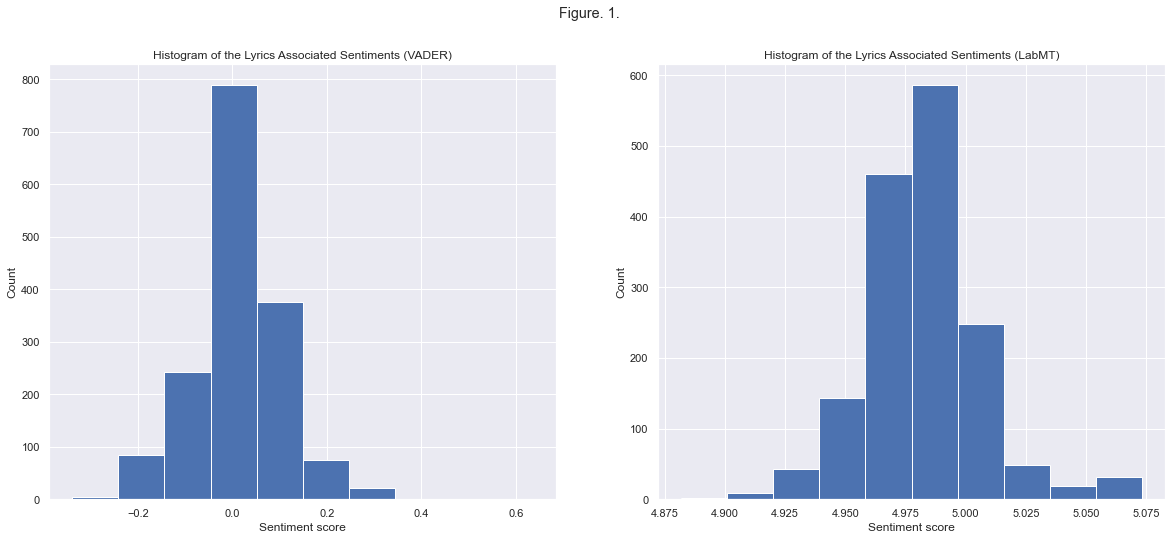

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

ax1.hist(df["sentiment_VADER"])
ax1.set_title("Histogram of the Lyrics Associated Sentiments (VADER)")
ax1.set_xlabel("Sentiment score")
ax1.set_ylabel("Count")

ax2.hist(df["sentiment_LabMT"])
ax2.set_title("Histogram of the Lyrics Associated Sentiments (LabMT)")
ax2.set_xlabel("Sentiment score")
ax2.set_ylabel("Count")
plt.suptitle("Figure. 1.")
plt.show()

Next, we go into analyzing the top 20 artist with saddest and happiest albums, based on the median sentiment of their lyrics. In Figures 2 and 3, we recognize some of the top saddest and top happiest artists among them, such as Aalyiah and Aretha Franklin, which makes us thnk that there could be a correlation the mean sentiment in lyrics and popularity.

In [ ]:
pd.options.display.max_colwidth = 150
#top 10 characters with happiest and saddest pages in Vader
vader_happy= df.nlargest(10, "sentiment_VADER")[["Artist","Album", "sentiment_VADER", "weeks_on_chart"]]
vader_sad= df.nsmallest(10, "sentiment_VADER")[["Artist","Album", "sentiment_VADER", "weeks_on_chart"]]
labmt_happy= df.nlargest(10, "sentiment_LabMT")[["Artist","Album", "sentiment_LabMT", "weeks_on_chart"]]
labmt_sad= df.nsmallest(10, "sentiment_LabMT")[["Artist","Album", "sentiment_LabMT", "weeks_on_chart"]]


In [ ]:
top_30 = df.groupby("Artist")\
            .agg(sentiment=("sentiment_VADER", np.median), std=("sentiment_VADER", np.std))\
            .sort_values("sentiment")[:30]
top_30 = top_30.fillna(0)

/Users/dariazahaleanu/opt/anaconda3/envs/sg2/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':
/Users/dariazahaleanu/opt/anaconda3/envs/sg2/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


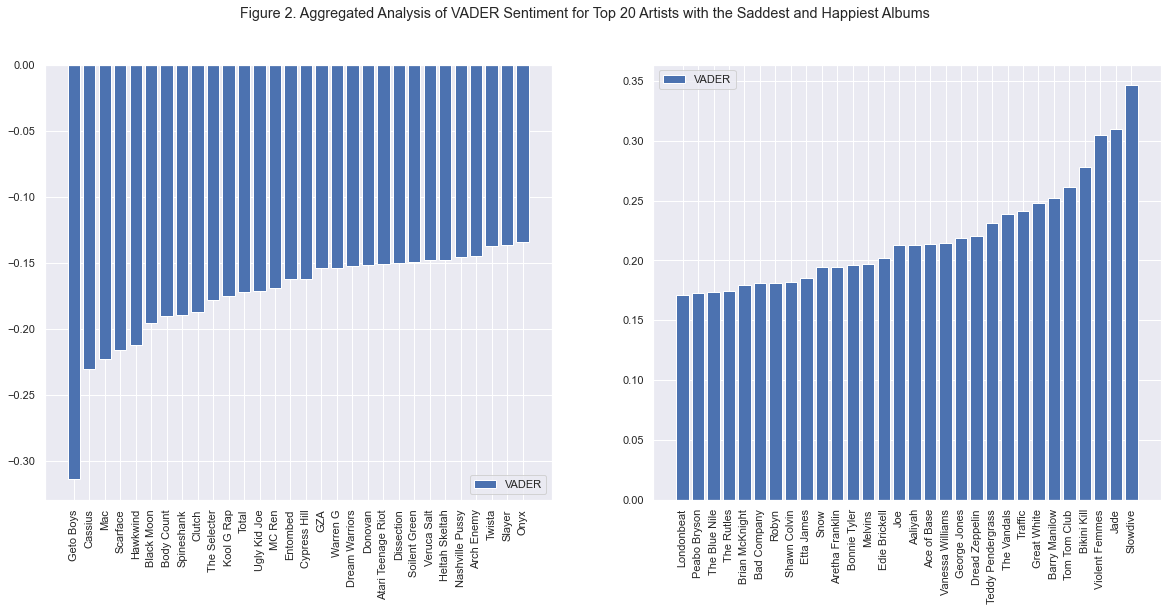

In [ ]:

top_20_happiest = df.groupby("Artist")\
            .agg(sentiment=("sentiment_VADER", np.median), std=("sentiment_VADER", np.std))\
            .sort_values("sentiment")[:30]

top_20_saddest = df.groupby("Artist")\
            .agg(sentiment=("sentiment_VADER", np.median), std=("sentiment_VADER", np.std))\
            .sort_values("sentiment")[-30:]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
p1 = ax1.bar(top_20_happiest.index, top_20_happiest["sentiment"], label="VADER")
p2 = ax2.bar(top_20_saddest.index, top_20_saddest["sentiment"], label="VADER")
ax1.set_xticklabels(labels=top_20_happiest.index, rotation=90)
ax2.set_xticklabels(labels=top_20_saddest.index, rotation=90)
ax1.legend()
ax2.legend()
plt.suptitle("Figure 2. Aggregated Analysis of VADER Sentiment for Top 20 Artists with the Saddest and Happiest Albums")
#plt.title("Distribution of Sentiment Score by for ")
plt.show()

/Users/dariazahaleanu/opt/anaconda3/envs/sg2/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/Users/dariazahaleanu/opt/anaconda3/envs/sg2/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


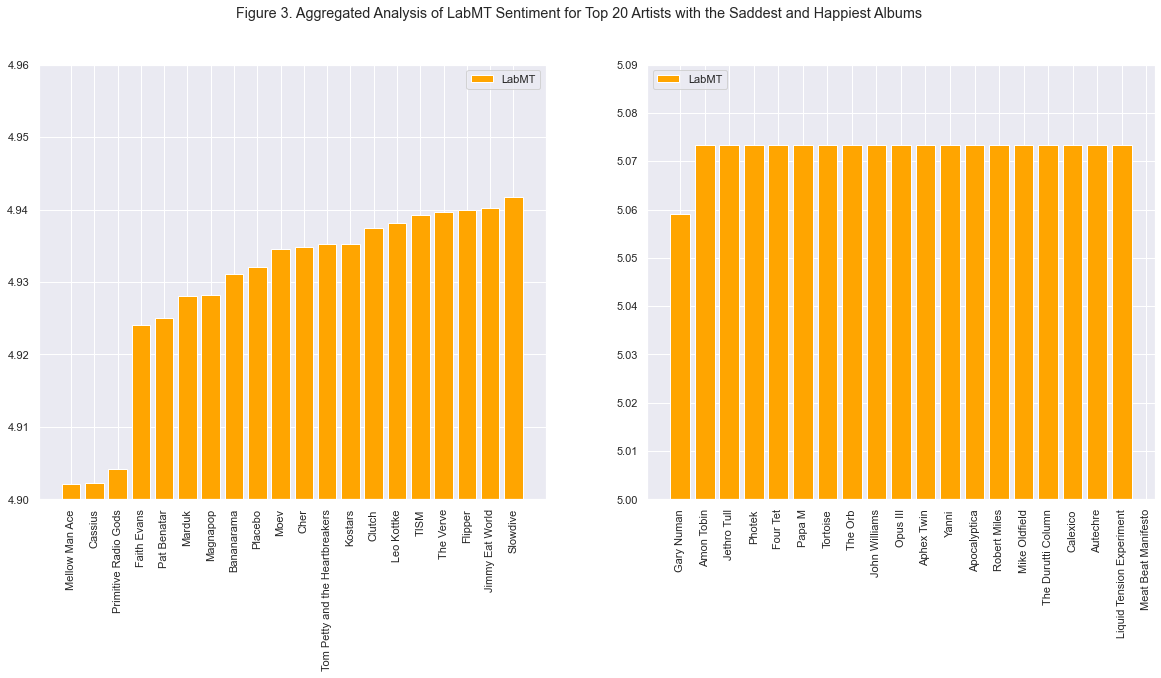

In [ ]:
top_20_happiest = df.groupby("Artist")\
            .agg(sentiment=("sentiment_LabMT", np.median), std=("sentiment_LabMT", np.std))\
            .sort_values("sentiment")[:20]\
            

top_20_saddest = df.groupby("Artist")\
            .agg(sentiment=("sentiment_LabMT", np.median), std=("sentiment_LabMT", np.std))\
            .sort_values("sentiment")[-20:]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
p1 = ax1.bar(top_20_happiest.index, top_20_happiest["sentiment"],label="LabMT", color='orange')
p2 = ax2.bar(top_20_saddest.index, top_20_saddest["sentiment"], label="LabMT", color='orange')

ax1.set_xticklabels(labels=top_20_happiest.index, rotation=90)
ax2.set_xticklabels(labels=top_20_saddest.index, rotation=90)
ax1.legend()
ax2.legend()
ax1.set_ylim(4.9, 4.96)
ax2.set_ylim(5, 5.09)
plt.suptitle("Figure 3. Aggregated Analysis of LabMT Sentiment for Top 20 Artists with the Saddest and Happiest Albums")
plt.show()

<!-- remove? 
Additionally, we went onto analyzing the progression of sentiments over the years. In Figure 4, we notice how for VADER, the distribution of sentiments over the years peaks in 1991, which seems to be the year with the highest sentiment score, and drops very low in 1992 and 1997. The LabMT distribution seems to be more uniform over the years. -->
<!-- In order to understand why VADER has such a greater variability over the years, we further analyzed the VADER score in conjunction with other variables as well.  -->

Next, we move onto analyzing the average sentiment per genre. To do so, we filtered our network for the top 30 most artists by sentiment score (artists represent the nodes in our network) and we extracted their associated genres. In Figure 4, we notice that some genres have a higher sentiment score than the others. Overall, based on our analysis so far, we believe LabMT has a more robust method of analyzing sentiments compared to VADER, which is why we will be moving forward to analyzing our data only with LabMT. 

/Users/dariazahaleanu/opt/anaconda3/envs/sg2/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.
/Users/dariazahaleanu/opt/anaconda3/envs/sg2/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


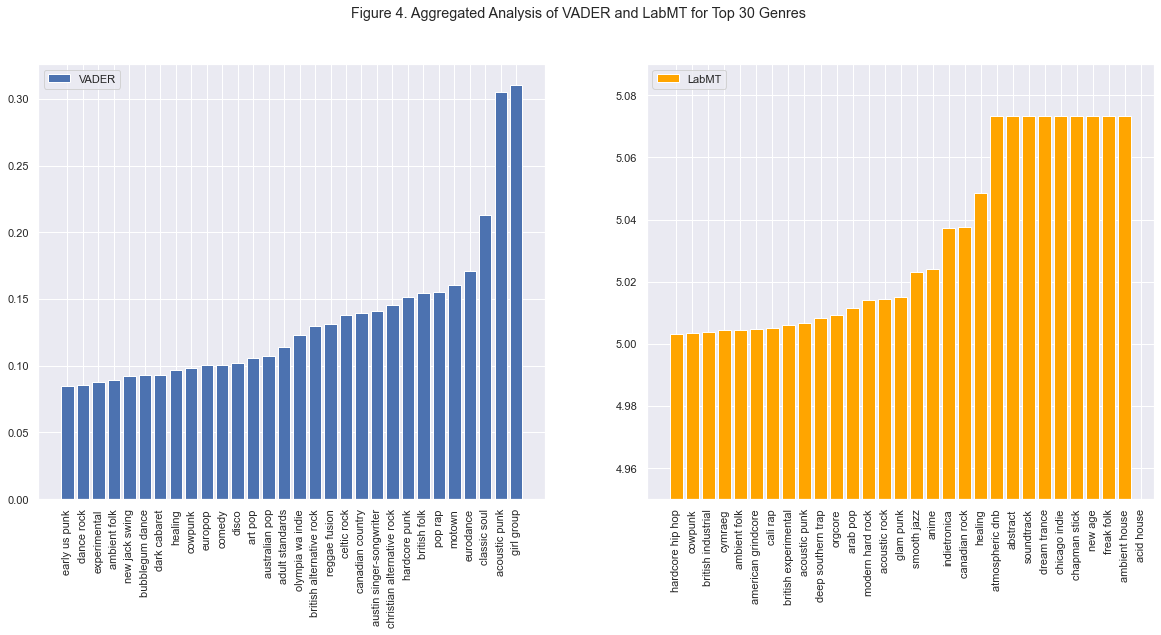

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
p1 = ax1.bar(top_20_vader.index, top_20_vader["sentiment"],label="VADER")
p2 = ax2.bar(top_20_labmt.index, top_20_labmt["sentiment"], label="LabMT", color='orange')
ax1.set_xticklabels(labels=top_20_vader.index, rotation=90)
ax2.set_xticklabels(labels=top_20_labmt.index, rotation=90)
ax2.set_ylim(4.95, 5.09)
ax1.legend()
ax2.legend()
plt.suptitle("Figure 4. Aggregated Analysis of VADER and LabMT for Top 30 Genres")
plt.show()

In Figure 5, a quick analysis of the LabMT score, in conjunction with the number of weeks in the Billboard chart and the number of collaborations indicates that the number of collaborations peaked in 1993, and it is met with a slight increase towards the end of the decade. The mean number of weeks in the Billboard chart per year, as well as the mean LabMT sentiment does not give us too much insight in this feature, but the relationship between the 3 indicators is interesting to explore further.

In [ ]:
## Avg LabMT sentiment by artists by genre
for i in range(len(df)):
    try:
        if df["artist_genre"][i].split(",")[0]:
            df["artist_genre_picked"][i] = df["artist_genre"][i].split(",")[0].replace(",", " ").replace("'", "").replace("[", "").replace("]", "").replace('"', '')
    except:
        pass

top_20_vader = df.groupby("artist_genre_picked")\
            .agg(sentiment=("sentiment_VADER", np.mean), std=("sentiment_VADER", np.std))\
            .sort_values("sentiment")[-30:]


top_20_labmt = df.groupby("artist_genre_picked")\
            .agg(sentiment=("sentiment_LabMT", np.mean), std=("sentiment_LabMT", np.std))\
            .sort_values("sentiment")[-30:]

/Users/dariazahaleanu/opt/anaconda3/envs/sg2/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


/Users/dariazahaleanu/opt/anaconda3/envs/sg2/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


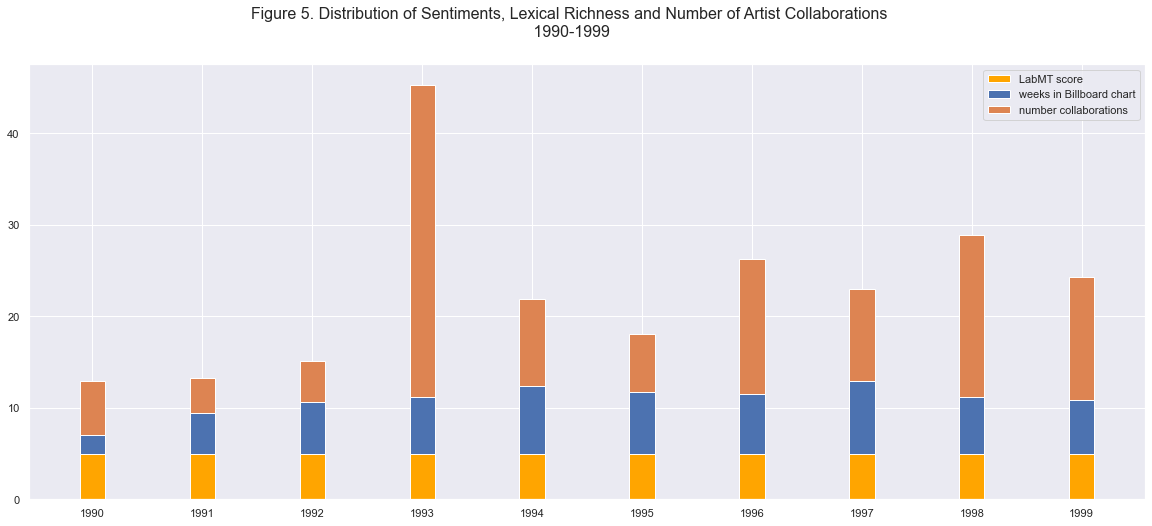

In [ ]:
df_sentiment = df.groupby([df.year])['sentiment_VADER', 'sentiment_LabMT', "lex_richness",  "instrumentalness", 
                                   "danceability", "liveness", "speechiness", "len_collabs", "acousticness", "weeks_on_chart"].mean()

fig, ax = plt.subplots(1,1, figsize=(20,8))
X_axis = np.arange(len(df_sentiment))
width = 0.23

plt.bar(df_sentiment.index, df_sentiment['sentiment_LabMT'],width = width, label="LabMT score", color="orange")

plt.bar(df_sentiment.index, df_sentiment['weeks_on_chart'],width = width, label="weeks in Billboard chart", bottom =df_sentiment['sentiment_LabMT'])
plt.bar(df_sentiment.index, df_sentiment['len_collabs'],width = width, label="number collaborations", bottom =df_sentiment['sentiment_LabMT']+ df_sentiment['weeks_on_chart'])
plt.xticks(df_sentiment.index)
plt.suptitle("Figure 5. Distribution of Sentiments, Lexical Richness and Number of Artist Collaborations\n 1990-1999", fontsize=16)
plt.legend()
plt.show()


Figure 6 presents an overview of the distribution of the sentiments per genre. Due to the polarity of the VADER sentiments which range between -1 and 1, Figure 6a) captures the wide spectrum of genre, ranging from punk (leftmost on th x-axis) to girl group (rightmost on the x-axis). Considering that girl groups have met a wide success in the 90's, with famous bands such as Destiny's Child and Spicy Girls, it is no surprise that the genre is associated with very happy sentiments. LabMT captures a wide range as well, but less polarized, with hardcore hiphop on one extreme and fold and ambient house on the positive extreme. 

/Users/dariazahaleanu/opt/anaconda3/envs/sg2/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/Users/dariazahaleanu/opt/anaconda3/envs/sg2/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator


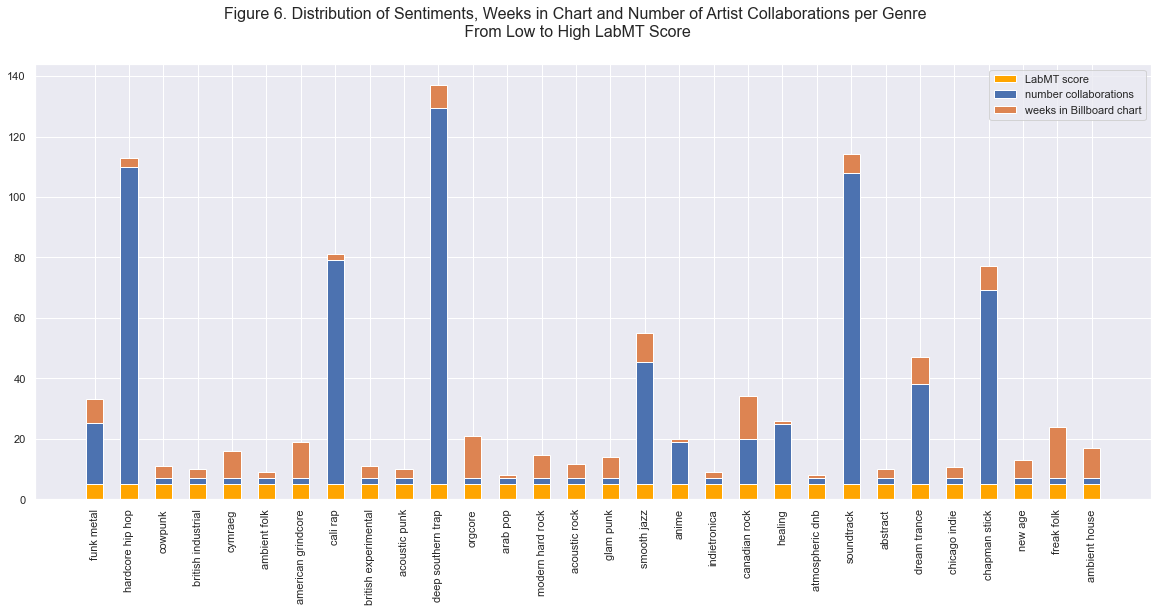

In [ ]:
df_sentiment_genre = df.groupby([df.artist_genre_picked])['sentiment_LabMT', "lex_richness",  "instrumentalness", 
                                   "danceability", "liveness", "speechiness", "len_collabs", "acousticness", "weeks_on_chart"].mean().sort_values("sentiment_LabMT")[-30:]

fig, ax = plt.subplots(1,1, figsize=(20,8))
X_axis = np.arange(len(df_sentiment_genre))
width = 0.5
means_sent = np.array(df_sentiment_genre['sentiment_LabMT'])
means_collabs = np.array(df_sentiment_genre['len_collabs'])
means_lex =np.array(df_sentiment_genre['lex_richness'])
means_chart=np.array(df_sentiment_genre['weeks_on_chart'])
#plt.bar(df_sentiment.index-width, df_sentiment['sentiment_VADER'] ,width = width, label="VADER")

plt.bar(df_sentiment_genre.index, means_sent, width = width, label="LabMT score", color="orange")
plt.bar(df_sentiment_genre.index, means_collabs,width = width, label="number collaborations", bottom=means_sent)
plt.bar(df_sentiment_genre.index, means_chart,  width = width, label="weeks in Billboard chart", bottom=means_collabs+means_sent)

ax.set_xticklabels(labels=df_sentiment_genre.index, rotation=90)
plt.suptitle("Figure 6. Distribution of Sentiments, Weeks in Chart and Number of Artist Collaborations per Genre\n From Low to High LabMT Score", fontsize=16)
plt.legend()
plt.show()


The plot in Figure 7 presents interesting findings, indicating that specific genres are more prone to a higher number of artistic collaborations, as well as a higher number of average weeks in chart. The plotted dataframe is sorted by the average sentiment, from left to right on the x-axis, suggesting that across the board a higher sentiment score may be correlated with a larger number of collaborations and weeks in chart. 

### 3.2.2. Average Sentiment per Community 
In order to further quantify our findings, we partitioned our network into the best communities using the Louvain algorithm. The partition resulted in 14 communities, which we named by the dominant genre of the top 3 connected artists. Furthermore, we averaged the LabMT sentiment score for each community.

In [ ]:
# # Load graph
with open("graph_building/G_sa.pickle", 'rb') as f:  
    G = pickle.load(f)

LC = max(nx.weakly_connected_components(G), key=len)
# Save only the largest component as G
GG = nx.DiGraph(G.subgraph(LC))
G_u = GG.to_undirected()

#returns a dic with the names of the artist and the assignedc community
partition_ids = community_louvain.best_partition(G_u)

keep_artists = {k for k in df["Artist"] if k in partition_ids.keys()}
df= df[df["Artist"].isin(keep_artists)]

In [ ]:
from sentiment_analysis import return_genre
from sentiment_analysis import return_label

partition_id_to_genre = {partition_id: partition_to_top3_genre(G_u, partition_ids, partition_id)
                        for partition_id in set(partition_ids.values())}

df["community"] = df["Artist"].apply(lambda name: partition_id_to_name[partition_ids[name]])
#df["community_genre"] = df["Artist"].apply(lambda name: partition_id_to_genre[partition_ids[name]])

dict_genre_artist = {x: y for x, y in zip(df["Artist"], df["artist_genre_picked"])}
dict_genre_label = {x: y for x, y in zip(df["Artist"], df["label"])}


df["community_genre"] = df["community"].apply(lambda community: return_genre(community, dict_genre_artist))

# Dataframe for the average sentiment in Vader and LabMT for each community
community_to_avg_sentiments = [{"community": community[0],
                                "community_genre": community[1],
                                "collaborations": df_comm["len_collabs"].mean(),
                                "lexical_richness": df_comm["lex_richness"].mean(),
                                "weeks in chart": round(df_comm["weeks_on_chart"].mean(), 2),
                                "peak_rank": round(df_comm["peak_rank"].mean(), 2),
                                "avg VADER sentiment": round(df_comm["sentiment_VADER"].mean(), 3),
                                "avg LabMT sentiment": round(df_comm["sentiment_LabMT"].mean(), 3)}
                               for community, df_comm 
                               in df.groupby(["community", "community_genre"])]

community_to_avg_sentiments = pd.DataFrame(community_to_avg_sentiments).sort_values("avg VADER sentiment", ascending=False)



In [ ]:
community_to_avg_sentiments["community_genre"] = community_to_avg_sentiments["community_genre"].replace(['alternative pop', '', 'alternative hip hop', 'alternative rock',
       'celtic new age disco house', 'canadian pop  ', '', '',
       'ambient alternative rock finnish metal', 'alternative metal  ',
       'hard rock', 'britpop boy band', 'latin pop bolero',
       'new wave pop  ', 'contemporary country country rock',
       'alternative rock'], ['alternative pop', '', 'alternative hip hop', 'alternative rock',
       'celtic new age disco house', 'canadian pop  ', 'rock', 'pop',
       'alternative rock finnish metal', 'alternative metal  ',
       'hard rock', 'britpop boy band', 'latin pop bolero',
       'new wave pop  ', 'contemporary country rock',
       'alternative rock'])

No handles with labels found to put in legend.


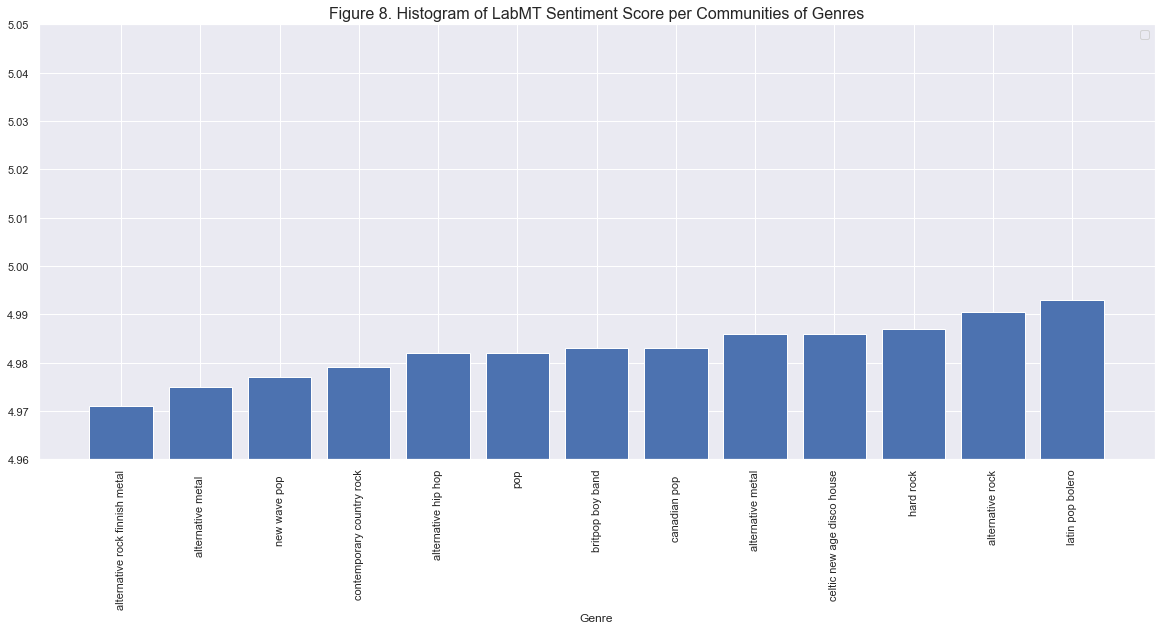

In [ ]:
comm_genre = community_to_avg_sentiments.groupby("community_genre")\
            .agg(LabMT=("avg LabMT sentiment", np.mean), std=("avg LabMT sentiment", np.std))\
            .sort_values("LabMT")

fig, ax = plt.subplots(1,1, figsize=(20,8))
X_axis = np.arange(len(community_to_avg_sentiments))
width = 0.5
plt.bar(x=comm_genre.index, height = comm_genre["LabMT"])
        

plt.xlabel("Genre")
plt.title("Figure 8. Histogram of LabMT Sentiment Score per Communities of Genres", fontsize=16)
plt.xticks(rotation=90)
plt.legend()
plt.ylim(4.96, 5.05)
plt.show()

Figure 8 indicates the histogram of the LabMT sentiment score per communities of genres. We can notice that based on this plot, the communities where alternative pop is the dominant genre have the most positive sentiment score, followed by alternatve hip-hop and disco house. 

Figure 9 and 10, we examined the relationship between average sentiment per community and the number of collaborations, as well as the number of weeks in the Billboard chart. Figure 9 indicates that the most negative communities of genres (the left ones) have a higher number of collaborations compared to the most positive ones. 

/Users/dariazahaleanu/opt/anaconda3/envs/sg2/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


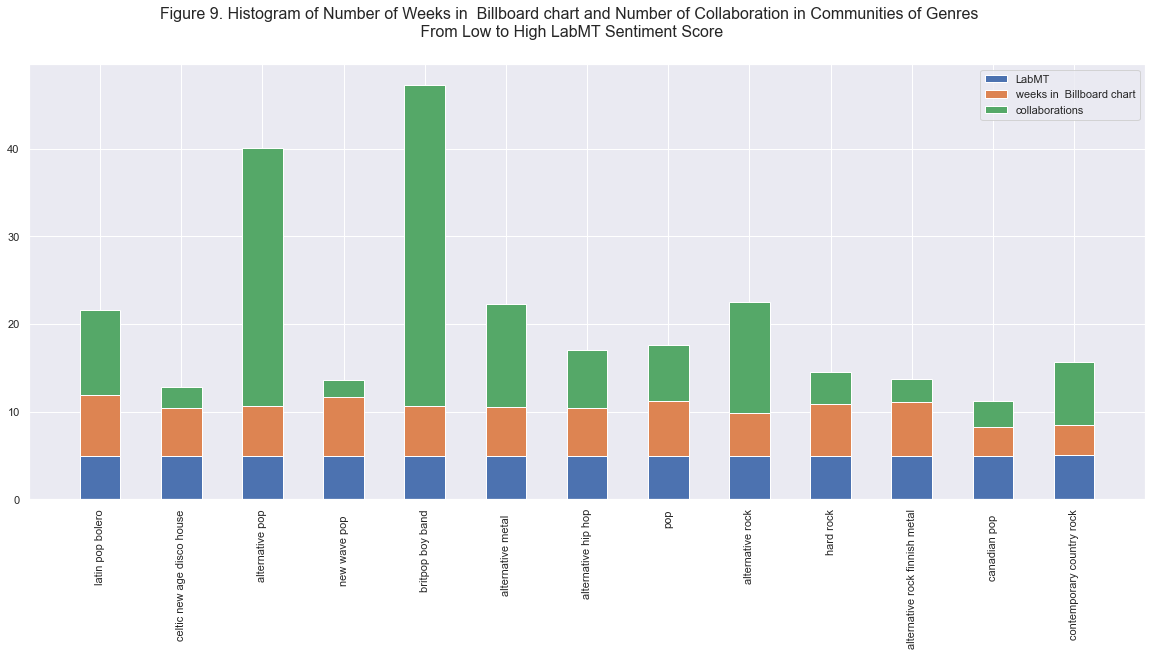

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(20,8))
X_axis = np.arange(len(community_to_avg_sentiments))
width = 0.5

comm_genre = community_to_avg_sentiments.groupby("community_genre")["avg VADER sentiment","avg LabMT sentiment", "lexical_richness", "collaborations", "weeks in chart", "peak_rank"]\
            .agg(np.mean)\
            .sort_values("avg LabMT sentiment")


plt.bar(comm_genre.index, comm_genre['avg LabMT sentiment'],width = width, label="LabMT")
plt.bar(comm_genre.index, np.array(comm_genre["weeks in chart"]),width = width, label="weeks in  Billboard chart", bottom=comm_genre['avg LabMT sentiment'])
plt.bar(comm_genre.index, np.array(comm_genre['collaborations']),width = width, label="collaborations", bottom=np.array(comm_genre["weeks in chart"]+comm_genre['avg LabMT sentiment']))
plt.suptitle("Figure 9. Histogram of Number of Weeks in  Billboard chart and Number of Collaboration in Communities of Genres\n From Low to High LabMT Sentiment Score", fontsize=16)
plt.xticks(rotation=90)
plt.legend()
plt.show()


/Users/dariazahaleanu/opt/anaconda3/envs/sg2/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


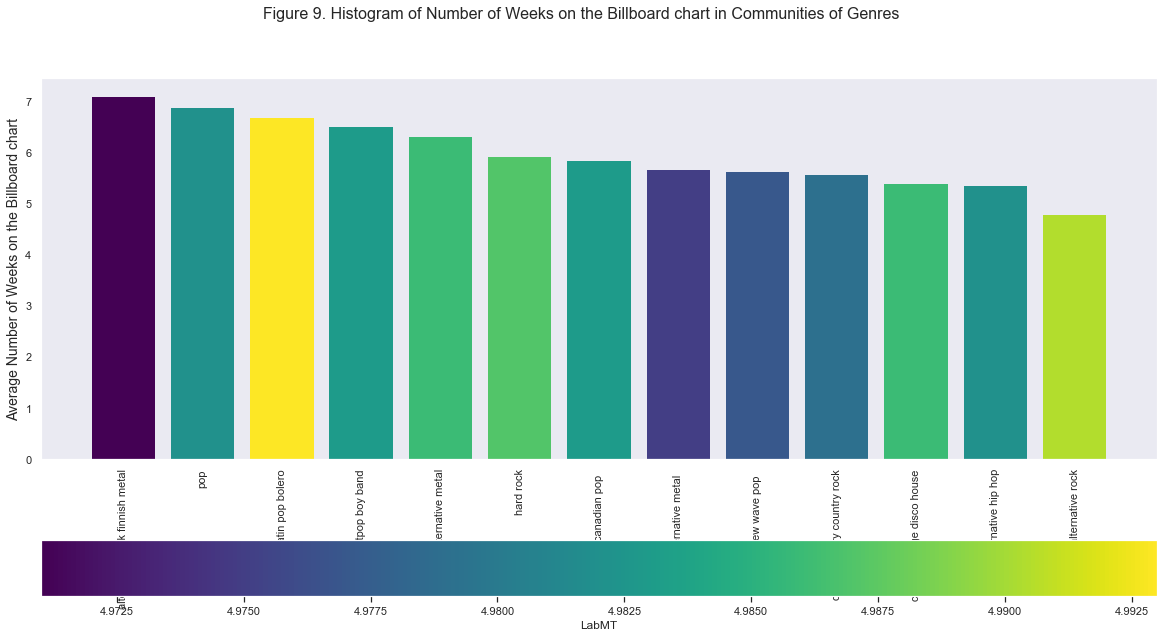

In [ ]:
comm_genre = community_to_avg_sentiments.groupby("community_genre")["avg VADER sentiment","avg LabMT sentiment", "lexical_richness", "collaborations", "weeks in chart", "peak_rank"]\
            .agg(np.mean)\
            .sort_values("weeks in chart", ascending=False)

plot_colorbar(comm_genre, 
              x="avg LabMT sentiment", 
              y="weeks in chart", 
              ylabel="Average Number of Weeks on the Billboard chart", 
              title="Figure 9. Histogram of Number of Weeks on the Billboard chart in Communities of Genres", 
              index=True)

/Users/dariazahaleanu/opt/anaconda3/envs/sg2/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


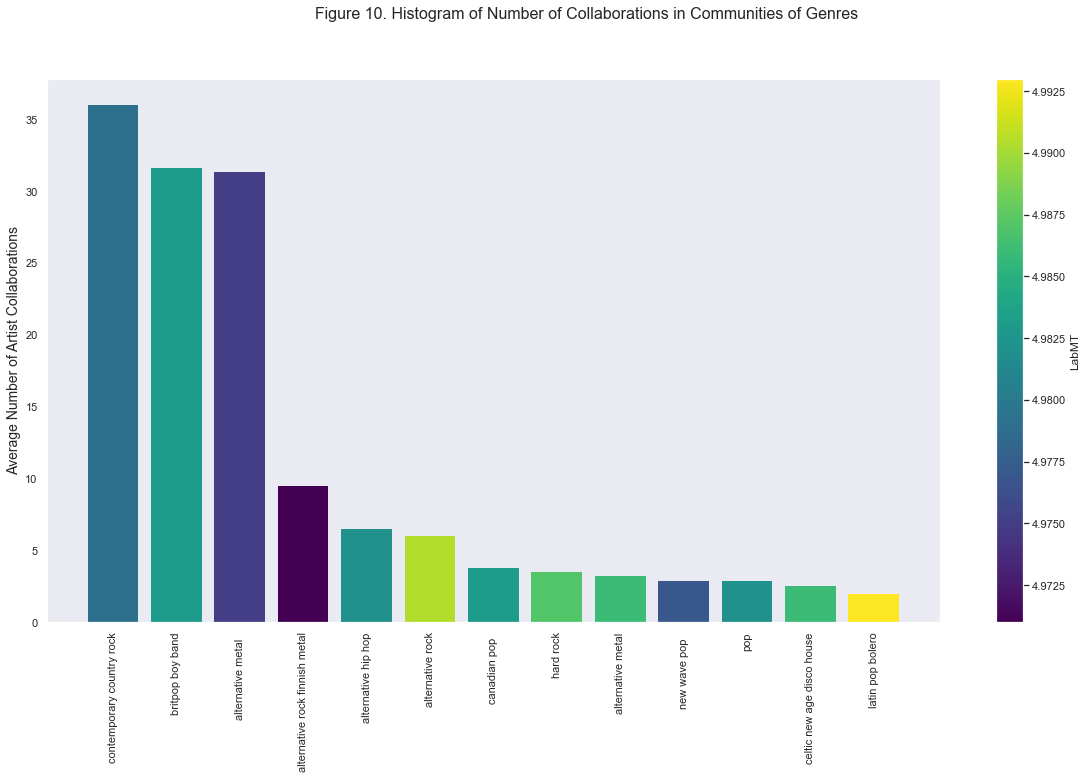

In [ ]:
comm_genre = community_to_avg_sentiments.groupby("community_genre")["avg VADER sentiment","avg LabMT sentiment", "lexical_richness", "collaborations", "weeks in chart", "peak_rank"]\
            .agg(np.mean)\
            .sort_values("collaborations", ascending=False)


plot_colorbar(comm_genre, 
              x="avg LabMT sentiment", 
              y="collaborations", 
              ylabel="Average Number of Artist Collaborations", 
              title="Figure 10. Histogram of Number of Collaborations in Communities of Genres", 
              index=True)

### 3.2.3. Analysis of the Top 30 Most Popular Artists by Sentiment, Genre, Number of collaborations and Number of weeks in the Billboard chart.
Furthermore, we went onto analyzing if the top 30 artists by the number of weeks in the Billboard chart and their corresponding genre, in relation to their sentiment score, the number of collaborations and the number of weeks in the Billboard chart.

In [ ]:
##top 30 artists
top_50 = df.groupby("artist_genre_picked")["Artist", "len_collabs","weeks_on_chart", "lex_richness", "instrumentalness", "sentiment_LabMT"]\
            .agg(np.mean)\
            .sort_values("weeks_on_chart", ascending=False)[:30]
top_50 = top_50.fillna("rock")
top_50 = top_50.reset_index()
top_50 = top_50.replace("c86", "indie pop")


/Users/dariazahaleanu/opt/anaconda3/envs/sg2/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


No handles with labels found to put in legend.


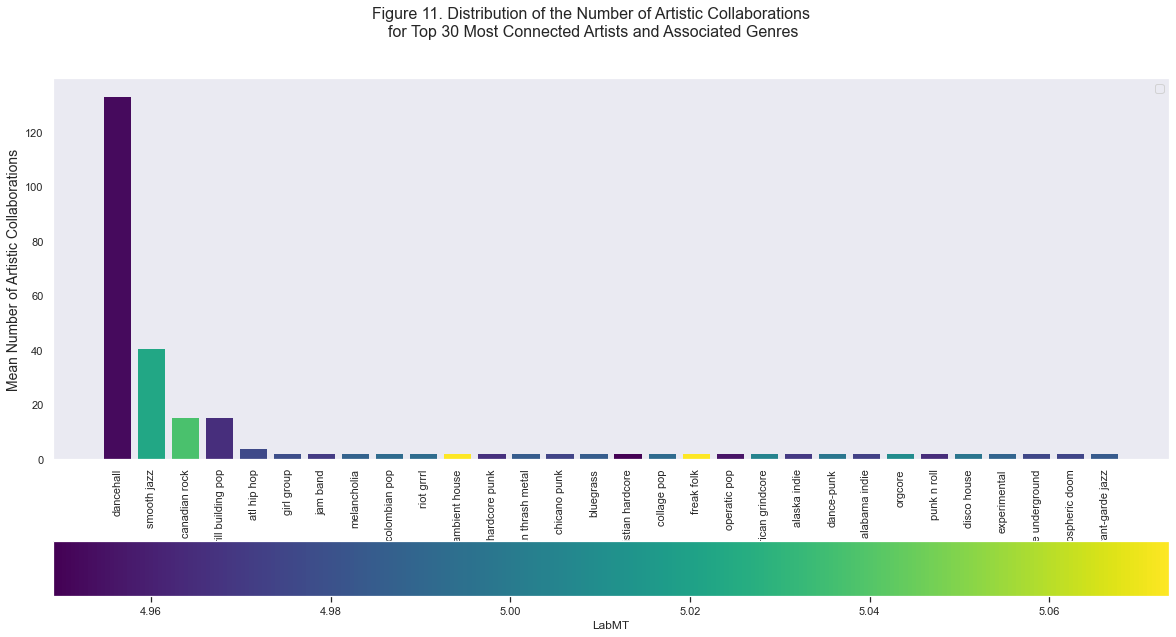

In [ ]:
top_50 = top_50.sort_values("len_collabs", ascending=False)[:30]
top_50 = top_50.reset_index()
plot_colorbar(top_50, 
              x="artist_genre_picked", 
              y="len_collabs", 
              ylabel="Mean Number of Artistic Collaborations", 
              title="Figure 11. Distribution of the Number of Artistic Collaborations \nfor Top 30 Most Connected Artists and Associated Genres", 
              index=False,
              cb_orientation="horizontal",
              color="sentiment_LabMT")


One more indicator which we have not taken into consideration before is the lexical richness, which refers to the ratio of different unique word stems (types) to the total number of words (tokens). The plot in Figure 12 indicates that there is a positive correlation between the sentiment score and the mean lexical richness per genre. For example, ambient house and freak folk, associated with a higher lexical richness, score also high on the LabMT bar.

No handles with labels found to put in legend.


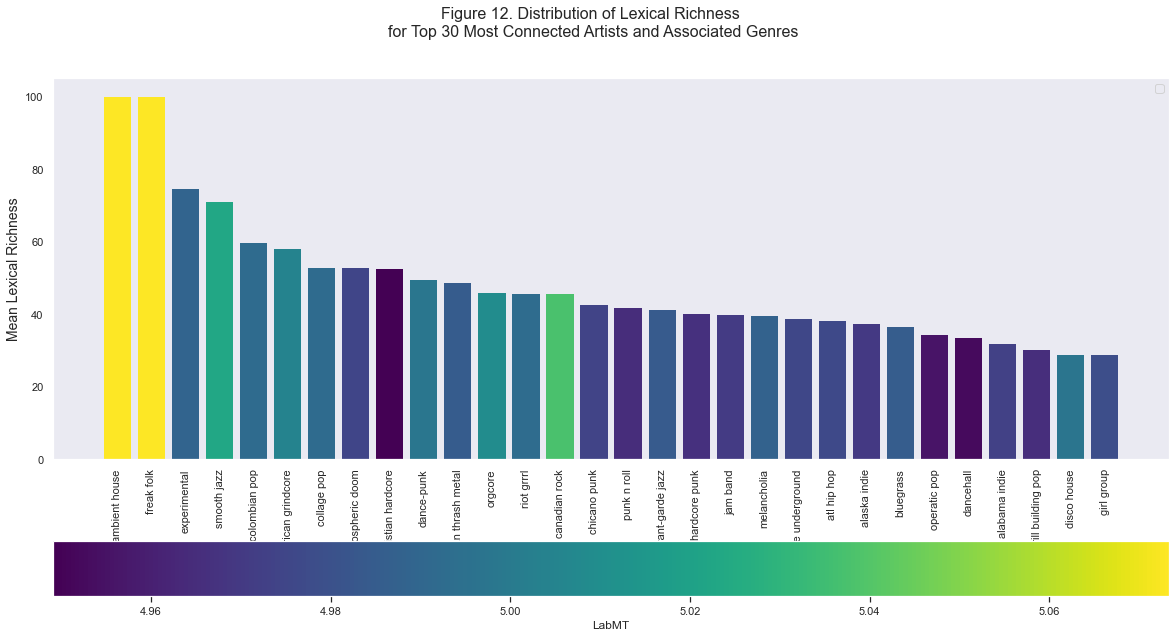

In [ ]:
top_50 = top_50.sort_values("lex_richness", ascending=False)[:30]
top_50 = top_50.reset_index()
plot_colorbar(top_50, 
              x="artist_genre_picked", 
              y="lex_richness", 
              ylabel="Mean Lexical Richness", 
              title="Figure 12. Distribution of Lexical Richness \nfor Top 30 Most Connected Artists and Associated Genres", 
              index=False,
              cb_orientation="horizontal",
              color="sentiment_LabMT")


All in all, from the analysis of part 3.2.1, we can conclude that genres such as hip hop, cal rap, southers trap, smooth jazz, soundtrack, trance are more prone to a larger number of collaborations and a greater number of weeks in chart and they are associated with a lower to neutral sentiment compared to the others.

From the analysis of part 3.2.2, of the communities of generes, we can infer that communities where the dominant genres are: britpop boy bands, alternative pop, alternative rock have a greater number of collaborations, but they are not necessarily associated with a specific sentiment.

From the analysis of part 3.2.3 of the top 30 artists by popularity, we can infer the following: genres which we analyzed before in part 3.2,1 such as dancehall, smooth jazz, disco jazz, have a high number of colllabs and lower sentiment score; genres such as girl(boy) bands have a lower number of colllabs and a lower sentiment score. 

Artists associated with a lower sentiment have a higher number of collabs and number of weeks in chart.
Certain popular genres in the 90's are more likely than others to feature in the billboard chart ie. girl's bands, but they do not necessily have more collaborations. 

In order to investigate whether the interplay between lexical richness, weeks on chart and the number of collaborations, we decided to run 3 regression models, in order to predict if the abovementioned features can be used to model and predict the sentiment of an artist or sentiment.

### 3.2.4. Regression Models for Sentiment Analysis Predictions 

For this part, we analyzed 3 regression models in order to predict the sentiment score based on various features which we previously identified as success indicators: number of collaborations, lexical richness, the number of weeks in the Billboard chart. The KDE (Kernel Density Estimation) and the scatterplots indicate that the analyzed coefficients follow a Gaussian distribution and that the most positive correlation in our chart is the one between lexical richness and sentiment.

In order to investigate whether the interplay between lexical richness, weeks on chart and the number of collaborations, we decided to run 3 regression models, in order to predict if the abovementioned features can be used to model and predict the sentiment of an artist or sentiment. For all 3 models, we look at the actual vs predicted value of the sentiment and we examine the ranking of the coefficients' importance.

In [ ]:
corr_matrix = df[["len_collabs", "lex_richness", "weeks_on_chart", "sentiment_LabMT"]]
corr_matrix.corr()

,len_collabs,lex_richness,weeks_on_chart,sentiment_LabMT
len_collabs,1.000000,0.028844,-0.039840,-0.028586
lex_richness,0.028844,1.000000,0.059683,0.259593
weeks_on_chart,-0.039840,0.059683,1.000000,0.012785
sentiment_LabMT,-0.028586,0.259593,0.012785,1.000000


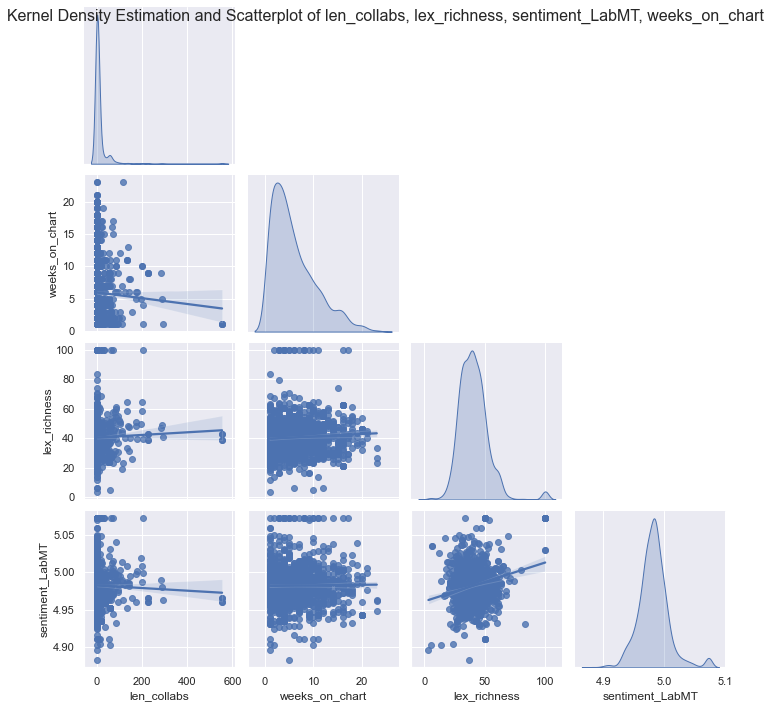

In [ ]:
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
df=df[~df["sentiment_LabMT"].isin([0.0])]
sns.pairplot(df[["len_collabs", "weeks_on_chart", "lex_richness", "sentiment_LabMT"]], kind='reg', diag_kind='kde', corner=True)
plt.suptitle("Kernel Density Estimation and Scatterplot of len_collabs, lex_richness, sentiment_LabMT, weeks_on_chart", fontsize=16)
plt.show()

In [ ]:
x = df[["len_collabs", "lex_richness", "weeks_on_chart"]]
y = df[["sentiment_LabMT"]]
y = y.to_numpy()
y = y.flatten()

In [ ]:
from sentiment_analysis import linear_prediction
from sentiment_analysis import plot_linear_prediction
from sentiment_analysis import linear_coef_imp

lin_model_pipe, lin_predicted = linear_prediction(x, y)
plot_linear_prediction(y, lin_predicted)
linear_coef_imp(lin_model_pipe, x, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


/Users/dariazahaleanu/opt/anaconda3/envs/sg2/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.


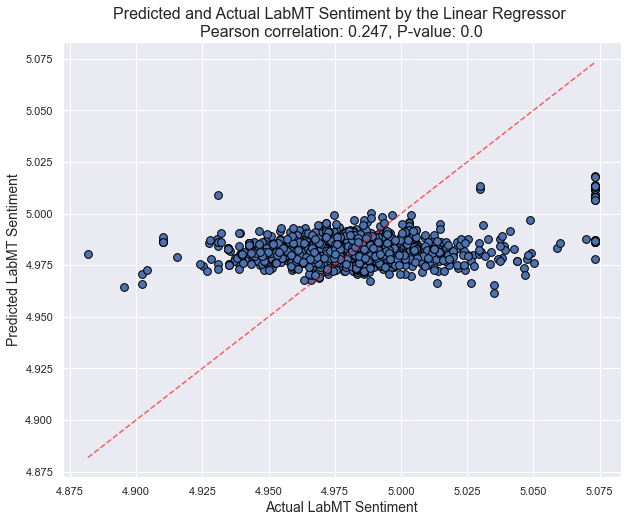

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


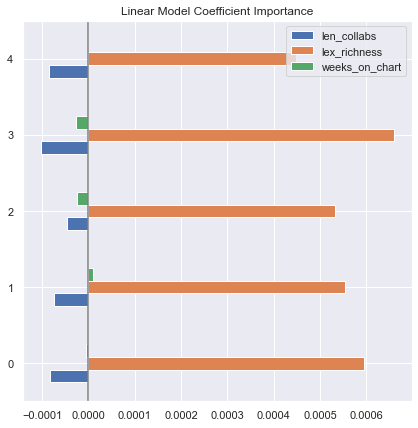

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.7s finished
/Users/dariazahaleanu/opt/anaconda3/envs/sg2/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.


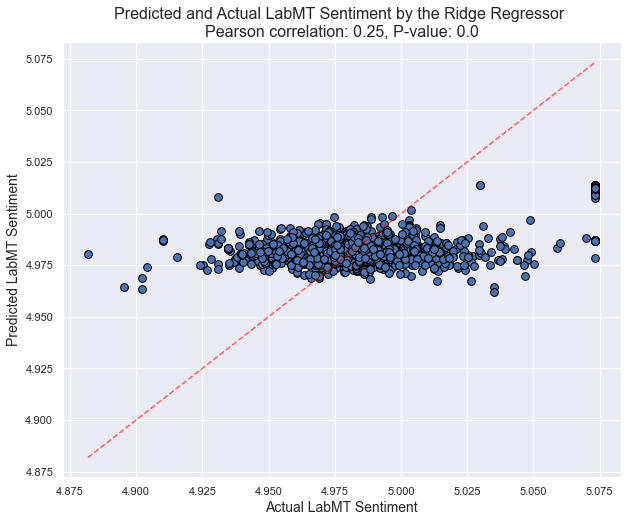

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.7s finished


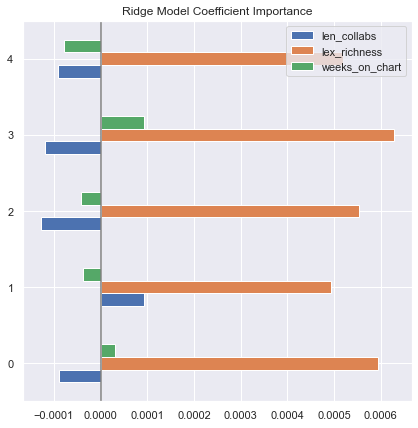

In [ ]:
from sentiment_analysis import ridge_prediction
from sentiment_analysis import ridge_coef_importance
from sentiment_analysis import plot_ridge_prediction

ridge_model_pipe, ridge_predicted = ridge_prediction(x, y)
plot_ridge_prediction(y, ridge_predicted)
ridge_coef_importance(ridge_model_pipe, x, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   29.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   32.6s finished
/Users/dariazahaleanu/opt/anaconda3/envs/sg2/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.


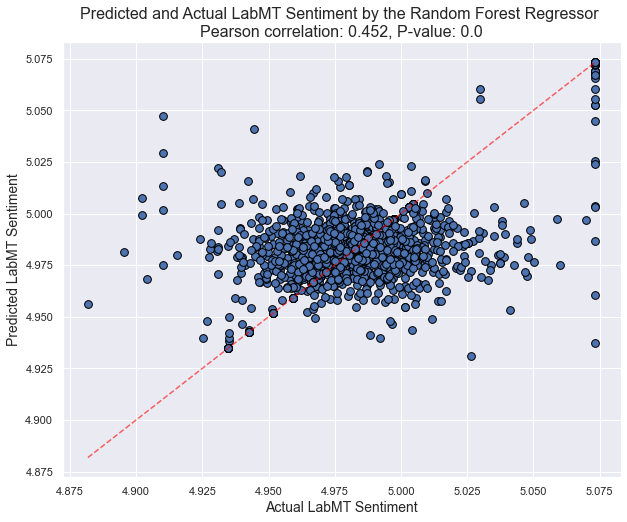

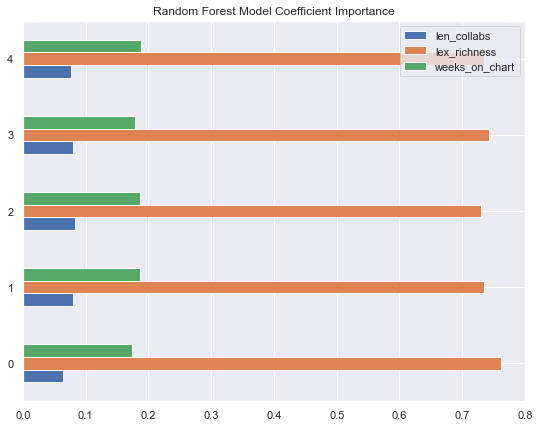

In [ ]:
from sentiment_analysis import random_forest_prediction
from sentiment_analysis import plot_random_forest
from sentiment_analysis import rf_coef_imp

rf_model, rf_predicted = random_forest_prediction(x, y)
plot_random_forest(y, rf_predicted)
rf_coef_imp(x, y, rf_model)


<!-- we'll add it on the website -->
<!-- ![Top 20 Most Used Words in Lyrics by Top 30 Artists](https://github.com/daz261/SocialGraphs/blob/main/project/data/top_20_words.png) -->

From the 3 regression models presented above, we conclude that the Random Forest regressor performed best, with a Spearmann coefficient of 0.452. One possible explanation for why the Random Forest performed better than the Linear and Ridge regressors is the fact that the other models are more prone to overfitting. Considering that we used the Kfold method, it may be that the adding the Random Forest's element of randomness for testing our data prevents overfitting. Across the board, we notice that all 3 models indicate that lexical richness is the most important feature in our dataset. We conclude that while the number of collaborations, the number of weeks in chart and lexical richness have an impact on the sentiment score, the impact is limited. All in all, we cannot predict an artist's album's sentiment score based solely on the number of weeks in chart and the number of collaborations. In other words, the number of collaborations may not be an indicator for an artist's success at all.

### 3.3 Machine Learning Predictions (ARTUR)

We can model connections within graph using artist-related dataset we have described in the previous sections. 
Firstly, we craft a number of features, that later will be later used as an input to a binary classifier. 

#### Feature engineering
We are using data from all the data sources in order to create a vector representing interaction between two artists. The first step to construct the dataset is to construct a network object with node attributes from auxiliary datasets.

Then, for each pair we have defined target variable as a binary value, which has value 1 if between two artists there is a connection and 0 otherwise.

Predictor variables list:
- *{audio_feature}\_difference*: for each Spotify's audio feature we compute an absolute difference between each nodes
- *{audio_feature}\_sum*: for each Spotify's audio feature we compute a sum both nodes
- *in_degree_difference* and *out_degree_difference* - difference between graph in and out degrees
- *in_degree_sum* and *out_degree_sum* - sum of graph in and out degrees
- *weeks_in_chart_diff* - difference of cummulative time the artist or a group spent in the Billboard charts
- *weeks_in_chart_sum* - difference of cummulative time the artist or a group spent in the Billboard charts
- *same_partition* - has value 1 if two artists belong to the same graph community
- *genre_overlap* - is the number of genres shared by both artists

We have decided to drop two last features: *same_partition* and *genre_overlap* because they seemed to be leaking information from the original graph and dominated other factors in terms of feature importance.

#### Dataset creation
We construct training set from undirected graph describing interaction between artists limited to years 1990-1995. Test set is analogous, but for years 1995-2000. We use twice as many negative class examples (without connection between artists) as of the positive class examples. Effectively, we have 11223 samples in training set and  15138 in test set.
Additionally, to make a more realistic evaluation, which would consider severe dataset imbalance, we also create a random connection sample from the test graph consisting of 10000 samples, out of which only about 14 are for connected nodes.

#### Model
For the sake of simplicity and ability to understand models prediction we use Logistic Regression. It defines the posterior probability of a positive class $C_1$ (existing connection between nodes in case of this project) as:

$$
p(C_1|\theta) = y(\theta) = \sigma(\textbf{w}^T\theta)
$$

where $p(C_2|\theta) = 1 - p(C_1|\theta)$ (TODO: CITE BISHOP). $\sigma()$ is a logistic function, which for any real input returns value in $[0, 1]$.

In order to obtain a decision we set a boundary at 0.5, which results in prediction $t = 1$ for $p(C_1|\theta) > 0$, otherwise $t=0$.

Weight vector $\textbf{w}$ represents what magnitue and direction on the classification each of the input features has.

#### Training example
Following code snippet shows all steps required to obtain a trained model and its evaluation.

In [ ]:
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent))

import pandas as pd
import sklearn.pipeline
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
from graph_building.build_network import build_network, plot_degree_distribution
from predictor.prepare_input import prepare_dataset, prepare_dataset_randomly
from predictor.train import train, evaluate, visualize_weights


ModuleNotFoundError: No module named 'project'

In [ ]:
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('clf', LogisticRegression())])

train_range = pd.date_range(start='1/01/1990', end='1/01/1995')
test_range = pd.date_range(start='1/01/1995', end='1/01/2001')

G_train = build_network(date_range=train_range)
G_test = build_network(date_range=test_range)

model, feature_names = train(pipeline, G_train)

train_eval = evaluate(model, G_train, "train")
test_eval = evaluate(model, G_test, "test")
test_rand_eval = evaluate(model, G_test, "random", random_dataset=True)

result_df = pd.DataFrame([train_eval, test_eval, test_rand_eval]).set_index("dataset")
plt.rcParams["figure.figsize"] = (13,13)
visualize_weights(model.steps[1][1], feature_names, "Logistic regression model weights visualization")

#### Results
We evaluate model using three metrics: precision, recall and F1, which is the harmonic mean of the precision and recall.

In [ ]:
result_df

Clearly, different proportions of positive to negative samples count result in a worse performance of the evaluation on randomly selected test set.

#### Insights given by model
As results show, model is mostly predicting the connection correctly, hence we assume that models weights give us insight into how actual collaboration take place.
Because all the inputs are standardized, we can compare the model weights directly. In general, we see that a positive weight would mean that a high value of said feature influences the chance of a connection between two nodes positively, while negative values behave oppositely. Feature weights close indicate that feature do not contribute at all.

Let us discuss the group of summed sound features first ("tempo_sum", "valence_sum" etc.). They do not seem to influence the results heavily, however high scores of instrumentalness, acousticness and speechiness in both artists appear to increase their chances of collaboration.

Differences between audio features play a greater role. In general, the greater the difference between two artists past audio, the less they are likely to collaborate.

However, it is the time spent in Billboard charts that matters to the model: both the absolute difference and sum of weeks spent in charts made it into top 3 most important features.

Keep in mind, that out degree stands for number of albums releaser by the artist/band. In degree represents the number of collaborations in other artists albums.
Apparently the more albums both artists have released, the more they are likely to collaborate. On the other hand, the smaller the  difference in number of collaborations in albums of other musicians, the lesser the chance of collaboration.


According to this model an ideal pair of musicians to collaborate is following: two musicians/groups, with high acousticness and speechiness, who don't differ a lot in any of sound features. They both are already known and have spent many weeks in top charts, ideally equal amount of time. In addition, each has released many albums and collaborated in some other projects. However, it would help if one of them would be much more active collaborator in other people's project than the other.

### 4. Discussion. (DARIA)

- Bullet points
What went well?,
What is still missing? What could be improved?, Why?

Further Work
Project Application: Web App

Input: Artist X

Output: Likelihood of success over time based on a number of factors (label, albums released, number of collaborations)


### 5.Contributions.  


### 6. References.  
1. We have imported most of the function in our explainer notebook from Python files in our project repository: https://github.com/daz261/SocialGraphs 

2. https://medium.com/fun-with-data-and-stats/visualizing-artist-collaborations-in-the-billboard-top-10-songs-ff6188a0f57b

3. https://www.udiscovermusic.com/stories/90s-music/

3. http://www.stat.cmu.edu/capstoneresearch/spring2020/315files/team3.html

4. https://joshdviner.medium.com/what-makes-a-hit-song-analyzing-data-from-the-billboard-hot-100-chart-74c1d5ad3fa3 

### 7. Appendix. 